# Hypothesis Testing with Men's and Women's Soccer Matches

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [52]:
# Start your code here!
import pandas as pd

mens_df = pd.read_csv('men_results.csv', parse_dates=['date']).drop(columns=['Unnamed: 0'])
women_df = pd.read_csv('women_results.csv', parse_dates=['date']).drop(columns=['Unnamed: 0'])

display(mens_df.head(), women_df.head())
display(mens_df.columns, women_df.columns)
display(mens_df.info(),women_df.info())
display(mens_df.describe(), women_df.describe())

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64       

None

None

,home_score,away_score
count,44353.000000,44353.000000
mean,1.740559,1.178793
std,1.748722,1.394580
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


,home_score,away_score
count,4884.000000,4884.000000
mean,2.272727,1.431409
std,2.736377,1.974651
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,24.000000,24.000000


In [53]:
# Filter for 'FIFA World Cup' 
mens_fifa = mens_df[mens_df['tournament'] == 'FIFA World Cup']
women_fifa = women_df[women_df['tournament'] == 'FIFA World Cup']

# FIlter for dates after '2002-01-01'
mens_fifa = mens_fifa[mens_fifa['date'] > '2002-01-01']
women_fifa = women_fifa[women_fifa['date'] > '2002-01-01']

# Create the mean goals column
mens_fifa['goals'] = (mens_fifa['home_score'] + mens_fifa['away_score'])
women_fifa['goals'] = (women_fifa['home_score'] + women_fifa['away_score'])
display(mens_fifa.head(), women_fifa.head())

,date,home_team,away_team,home_score,away_score,tournament,goals
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


,date,home_team,away_team,home_score,away_score,tournament,goals
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


Shape of mens samples: (384, 7)
Shape of womens samples: (200, 7)


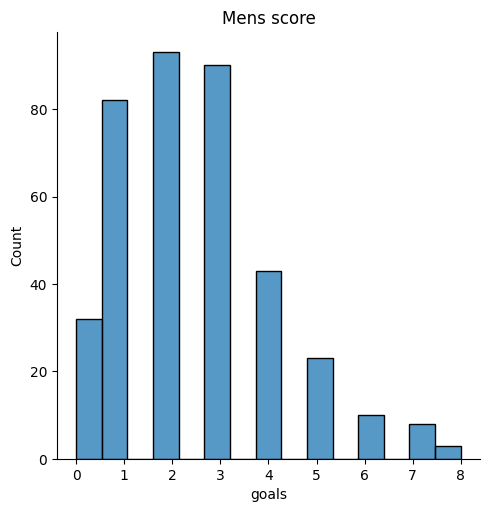

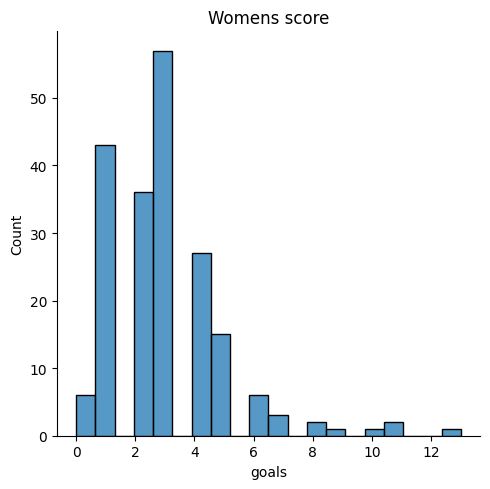

Womens:

Kolmogorov-Smirnov Test:
KS Statistic: 0.8113447460685429
P-Value: 9.431656241073109e-144

Shapiro-Wilk Test:
Shapiro Statistic: 0.8491013050079346
P-Value: 3.8905201759850683e-13

Mens:

Kolmogorov-Smirnov Test:
KS Statistic: 0.7580114127352096
P-Value: 4.802304083566536e-230

Shapiro-Wilk Test:
Shapiro Statistic: 0.9266489744186401
P-Value: 8.894154401688226e-13


In [54]:
# Choosing an hypothesis test for the dataset

# Check number of samples
print(f'Shape of mens samples: {mens_fifa.shape}\nShape of womens samples: {women_fifa.shape}')

# Check the distribution of the data using a histogram
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

womens_mean_score = women_fifa['goals']
mens_mean_score = mens_fifa['goals']

sns.displot(mens_mean_score).set(title='Mens score')
sns.displot(womens_mean_score).set(title='Womens score')
plt.tight_layout()
plt.show()

# Using Shapiro and Kolmogorov

print('Womens:\n')
# Kolmogorov-Smirnov Test women
ks_statistic, ks_p_value = stats.kstest(womens_mean_score, 'norm')
print("Kolmogorov-Smirnov Test:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {ks_p_value}")

# Shapiro-Wilk Test women
shapiro_statistic, shapiro_p_value = stats.shapiro(womens_mean_score)
print("\nShapiro-Wilk Test:")
print(f"Shapiro Statistic: {shapiro_statistic}")
print(f"P-Value: {shapiro_p_value}")

print('\nMens:\n')
# Kolmogorov-Smirnov Test men
ks_statistic, ks_p_value = stats.kstest(mens_mean_score, 'norm')
print("Kolmogorov-Smirnov Test:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {ks_p_value}")

# Shapiro-Wilk Test men
shapiro_statistic, shapiro_p_value = stats.shapiro(mens_mean_score)
print("\nShapiro-Wilk Test:")
print(f"Shapiro Statistic: {shapiro_statistic}")
print(f"P-Value: {shapiro_p_value}")


In [55]:
# Given the non-parametric nature and the size of the dataset, an Wilcoxon-Mann-Whitney will be performed
statistic, p_val = stats.mannwhitneyu(womens_mean_score, mens_mean_score, alternative='greater')

print(p_value)

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

0.005106609825443641
